In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
# Loading dataset
data_set = load_dataset('lukebarousse/data_jobs')
df = data_set['train'].to_pandas()
# Cleaning dataset
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [2]:
df.pivot_table(index='job_title_short', aggfunc= 'size')

job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

In [3]:
df_top_countries_salary = df.copy()

In [4]:
top_countries = df['job_country'].value_counts().head(6).index
job_titles = ['Data Analyst','Data Scientist','Data Engineer']
df_top_countries_salary = df_top_countries_salary.pivot_table(index='job_country',columns='job_title_short',aggfunc='median',values= 'salary_year_avg')
df_top_countries_salary = df_top_countries_salary[job_titles]
df_top_countries_salary = df_top_countries_salary.loc[top_countries]


In [5]:
df_top_countries_salary

job_title_short,Data Analyst,Data Scientist,Data Engineer
job_country,,,
United States,90000.0,130000.0,125000.0
India,100500.0,114008.0,147500.0
United Kingdom,87750.0,105300.0,110000.0
France,69175.0,88128.0,98301.5
Germany,103750.0,131560.0,147500.0
Spain,91977.0,88128.0,133000.0


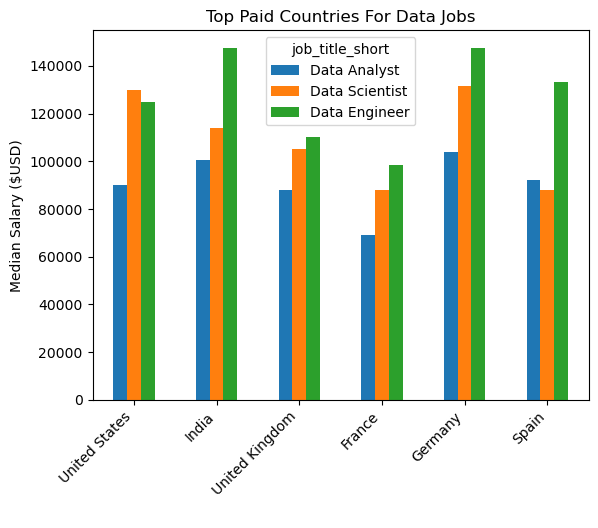

In [6]:
df_top_countries_salary.plot(kind='bar')
plt.title('Top Paid Countries For Data Jobs')
plt.ylabel('Median Salary ($USD)')
plt.xlabel(' ')
plt.xticks(rotation = 45 , ha = 'right')
plt.show()